# Importing libiraries

In [147]:
from numpy import *
from pandas import *
from matplotlib import pyplot as plt
import seaborn as snp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error  
from sklearn.tree import DecisionTreeRegressor

In [148]:
diamond_data=read_csv(r"C:\Users\DELL\Documents\SKlearn\Projects\diamonds.csv")

In [149]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [150]:
diamond_data.shape

(50000, 10)

# Data preprocessing

In [151]:
# Checking for null values
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [152]:
#Checking for duplicated values
diamond_data.duplicated().sum()

126

In [153]:
#Removing duplicate values
diamond_data=diamond_data.drop_duplicates()

In [154]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49874 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49874 non-null  float64
 1   cut      49874 non-null  object 
 2   color    49874 non-null  object 
 3   clarity  49874 non-null  object 
 4   depth    49874 non-null  float64
 5   table    49874 non-null  float64
 6   price    49874 non-null  int64  
 7   x        49874 non-null  float64
 8   y        49874 non-null  float64
 9   z        49874 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB


# Explaratory data analysis

In [155]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [156]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000
mean,0.799331,61.751803,57.458786,3945.384569,5.734441,5.738060,3.541028
std,0.474607,1.428207,2.231087,3996.939331,1.122340,1.144973,0.706607
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,952.000000,4.720000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2414.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5352.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [157]:
diamond_data.nunique()

carat        272
cut            5
color          7
clarity        8
depth        181
table        126
price      11297
x            553
y            551
z            371
dtype: int64

In [158]:
diamond_data["color"].value_counts()

G    10424
E     9067
F     8844
H     7683
D     6209
I     5045
J     2602
Name: color, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


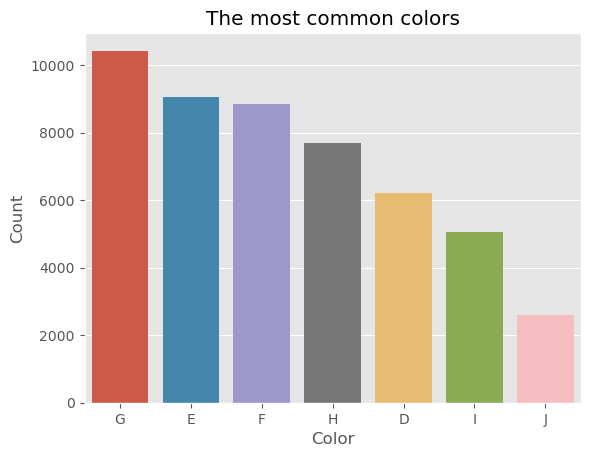

In [159]:
# Determining the colors that is most common
snp.barplot(diamond_data["color"].value_counts().index,diamond_data["color"].value_counts())
plt.xlabel("Color")
plt.ylabel("Count")
plt.title("The most common colors")
plt.show()

In [160]:
diamond_data["cut"].value_counts()

Ideal        19881
Premium      12769
Very Good    11194
Good          4547
Fair          1483
Name: cut, dtype: int64

Text(0.5, 1.0, 'The common cutting methods')

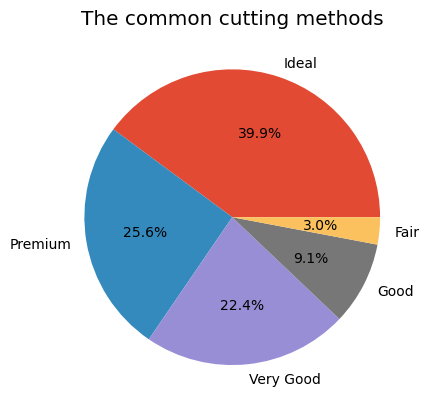

In [161]:
# Most common cutting methods
plt.pie(diamond_data["cut"].value_counts(),labels=diamond_data["cut"].value_counts().index,autopct='%1.1f%%')
plt.title("The common cutting methods")

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


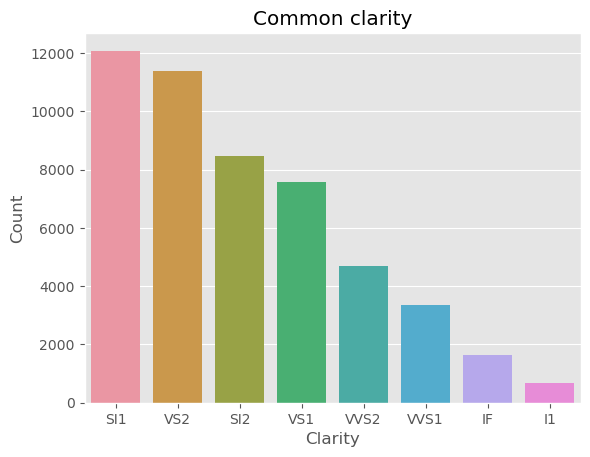

In [162]:
snp.barplot(diamond_data["clarity"].value_counts().index,diamond_data["clarity"].value_counts())
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.title("Common clarity")
plt.show()

In [163]:
#Colors that have the highest price
color_price=diamond_data.groupby("color").mean()["price"].to_frame().sort_values(by=["price"],ascending=False)

In [164]:
color_price

,price
color,
J,5348.705227
I,5095.408722
H,4493.825198
G,4006.820798
F,3742.755201
D,3182.718312
E,3087.334069


Text(0, 0.5, 'Price')

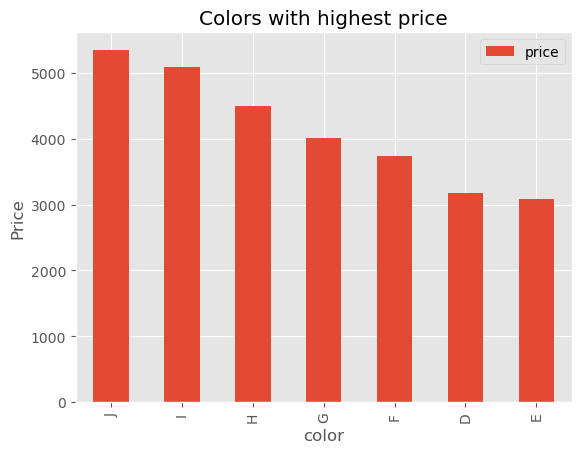

In [165]:
color_price.plot(kind='bar')
plt.title("Colors with highest price")
plt.ylabel("Price")

In [166]:
cut_price=diamond_data.groupby("cut").mean()["price"].sort_values(ascending=False)

In [167]:
cut_price

cut
Premium      4607.948391
Fair         4311.363452
Very Good    3985.889762
Good         3952.683748
Ideal        3468.063075
Name: price, dtype: float64

Text(0.5, 1.0, 'Cutting method that provide the best price')

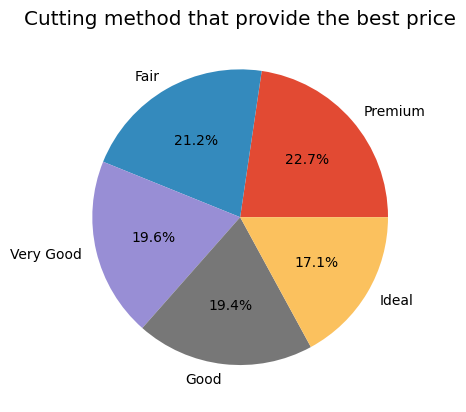

In [168]:
#Cutting method that provide the best price
plt.pie(cut_price,labels=cut_price.index,autopct='%1.1f%%')
plt.title("Cutting method that provide the best price")

In [169]:
#Clarity with the highest price
clarity_price=diamond_data.groupby("clarity").mean()["price"].sort_values(ascending=False)

In [170]:
clarity_price

clarity
SI2     5087.276317
SI1     4000.194109
I1      3941.836972
VS2     3941.120671
VS1     3841.344527
VVS2    3279.593770
IF      2909.402214
VVS1    2546.004163
Name: price, dtype: float64

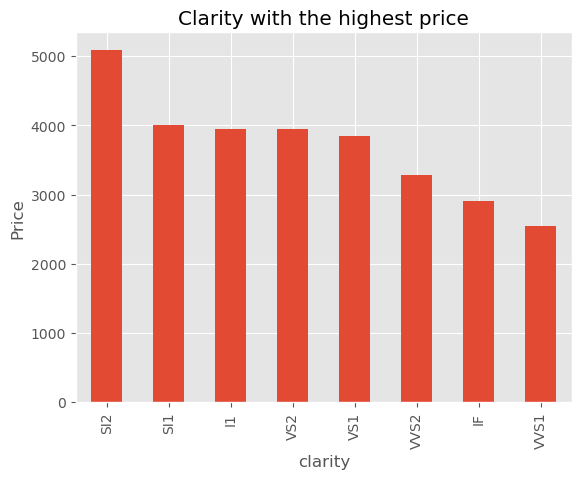

In [171]:
clarity_price.plot(kind="bar")
plt.title('Clarity with the highest price')
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Price')

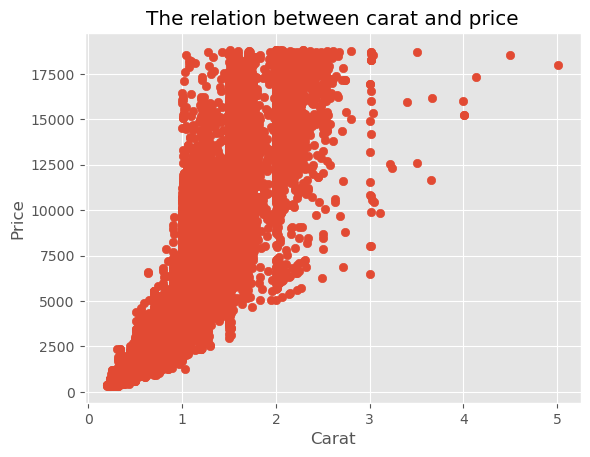

In [172]:
plt.style.use("ggplot")
plt.scatter(diamond_data["carat"],diamond_data["price"])
plt.title("The relation between carat and price")
plt.xlabel("Carat")
plt.ylabel("Price")

# Adjusting the data for ML algorithms

In [173]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49874 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49874 non-null  float64
 1   cut      49874 non-null  object 
 2   color    49874 non-null  object 
 3   clarity  49874 non-null  object 
 4   depth    49874 non-null  float64
 5   table    49874 non-null  float64
 6   price    49874 non-null  int64  
 7   x        49874 non-null  float64
 8   y        49874 non-null  float64
 9   z        49874 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB


In [174]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Adjusting data types

In [175]:
diamond_data["cut"]=diamond_data["cut"].map(
    {'Ideal':1, 'Premium':2, 'Good':4, 'Very Good':3, 'Fair':5})

In [176]:
diamond_data["color"]=diamond_data["color"].map(
    {'E':1, 'I':2, 'J':3, 'H':4, 'F':5, 'G':6, 'D':7})

In [177]:
diamond_data["clarity"]=diamond_data["clarity"].map(
    {'SI2':2, 'SI1':1, 'VS1':3, 'VS2':4, 'VVS2':6, 'VVS1':5, 'I1':7, 'IF':8})

In [178]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49874 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49874 non-null  float64
 1   cut      49874 non-null  int64  
 2   color    49874 non-null  int64  
 3   clarity  49874 non-null  int64  
 4   depth    49874 non-null  float64
 5   table    49874 non-null  float64
 6   price    49874 non-null  int64  
 7   x        49874 non-null  float64
 8   y        49874 non-null  float64
 9   z        49874 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.2 MB


In [179]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,1,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,1,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,3,2,63.3,58.0,335,4.34,4.35,2.75


In [180]:
# The relation between features
corr=diamond_data.corr()

In [181]:
corr

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.133561,-0.064896,-0.223245,0.027445,0.183153,0.921780,0.975102,0.950013,0.952655
cut,0.133561,1.000000,-0.024753,-0.130602,0.222883,0.432509,0.052303,0.124312,0.119948,0.148267
color,-0.064896,-0.024753,1.000000,0.037622,0.000829,-0.033565,-0.016239,-0.054688,-0.054141,-0.055013
clarity,-0.223245,-0.130602,0.037622,1.000000,-0.030562,-0.119057,-0.102975,-0.249143,-0.241214,-0.245088
depth,0.027445,0.222883,0.000829,-0.030562,1.000000,-0.294828,-0.013112,-0.025713,-0.029946,0.094030
table,0.183153,0.432509,-0.033565,-0.119057,-0.294828,1.000000,0.129283,0.196560,0.184578,0.152385
price,0.921780,0.052303,-0.016239,-0.102975,-0.013112,0.129283,1.000000,0.884844,0.864232,0.860791
x,0.975102,0.124312,-0.054688,-0.249143,-0.025713,0.196560,0.884844,1.000000,0.972881,0.970057
y,0.950013,0.119948,-0.054141,-0.241214,-0.029946,0.184578,0.864232,0.972881,1.000000,0.949898
z,0.952655,0.148267,-0.055013,-0.245088,0.094030,0.152385,0.860791,0.970057,0.949898,1.000000


<AxesSubplot:>

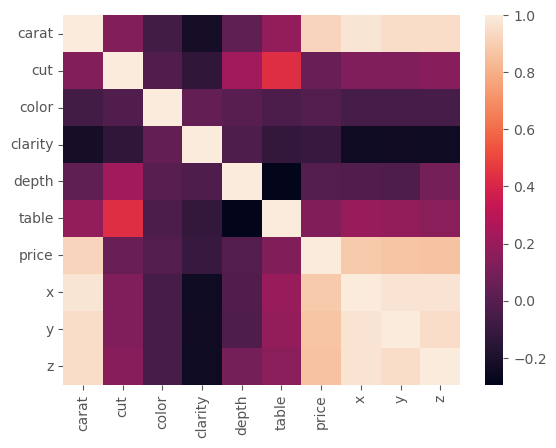

In [182]:
snp.heatmap(corr,annot=False)

The price depends mostly on carat and coordinates(X,Y,Z) so, these features will be the most important in ML algorithms

# Indentifing both Features and target

In [183]:
diamond_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,1,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,1,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,3,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,1,7,1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,4,7,1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,3,7,1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,2,4,2,61.0,58.0,2757,6.15,6.12,3.74


In [184]:
X=diamond_data.drop(columns="price")

In [185]:
y=diamond_data["price"]

# Splitting tthe data

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [187]:
X_train.shape

(33415, 9)

In [188]:
y_test.shape

(16459,)

# Pridicting Diamond price

# Using Neural Networks

#Building the model
MLPRegressorModel = MLPRegressor(activation='relu', 
                                 solver='adam', 
                                 learning_rate='constant', 
                                 early_stopping= False,
                                 max_iter=500,
                                 alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)


In [189]:
#fitting the data
MLPRegressorModel.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 3), max_iter=500, random_state=33)

In [190]:
# Checking the score
MLPRegressorModel.score(X_train, y_train)

0.9214271126667781

In [191]:
MLPRegressorModel.score(X_test, y_test)

0.9188453306220016

In [192]:
y_pred=MLPRegressorModel.predict(X_test)

In [193]:
y_pred[:10]

array([ 6090.08465996,  2420.82713411,   528.26555155,   697.43043097,
        3649.71958593,   688.70527465,  9471.86499365,  9613.48603959,
       15498.137786  ,  6522.8976018 ])

In [194]:
y_test[:10]

12996     5712
47201     2321
30122      795
27758      713
3568      3481
27003      689
18296     8342
18423     8458
24323    15653
13648     5950
Name: price, dtype: int64

In [195]:
#Calculating the mean absolute error
MAE1=mean_absolute_error(y_pred,y_test)

In [196]:
MAE1

620.4029332930554

# Using Decision Tree

In [197]:
#Building the model
DecisionTreeRegressorModel = DecisionTreeRegressor()

In [198]:
#fitting the data
DecisionTreeRegressorModel.fit(X_train, y_train)

DecisionTreeRegressor()

In [199]:
# Checking the score
DecisionTreeRegressorModel.score(X_train, y_train)

0.999997186343242

In [200]:
DecisionTreeRegressorModel.score(X_test, y_test)

0.9592543539426003

In [201]:
# checking the model
y_pre=DecisionTreeRegressorModel.predict(X_test)

In [202]:
y_pre[:10]

array([ 5082.,  2286.,   658.,   626.,  3208.,   689.,  7494.,  9261.,
       15511.,  4661.])

In [203]:
y_test[:10]

12996     5712
47201     2321
30122      795
27758      713
3568      3481
27003      689
18296     8342
18423     8458
24323    15653
13648     5950
Name: price, dtype: int64

# Model evaluation

In [204]:
#Calculating the mean absolute error for Neural Network model
MAE1=mean_absolute_error(y_pred,y_test)

In [205]:
#Calculating the mean absolute error for Decision Tree model
MAE2=mean_absolute_error(y_pre,y_test)

In [206]:
MAE1

620.4029332930554

In [207]:
MAE2

388.3071875569597

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


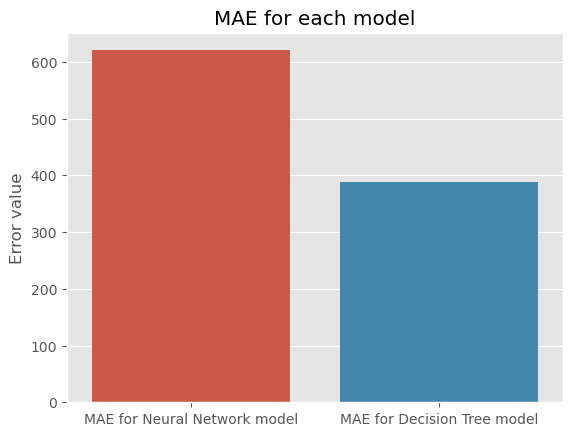

In [208]:
snp.barplot(["MAE for Neural Network model","MAE for Decision Tree model"],[MAE1,MAE2])
plt.title("MAE for each model")
plt.ylabel("Error value")
plt.show()

Descision Tree model is better than Neural Network Model as It give a score of 99% 
for training data and a score of 96% for testing data with a small mean absolute error.